In [1]:
!git clone https://github.com/SAAD1190/GroundingSam.git

Cloning into 'GroundingSam'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 91 (delta 7), reused 0 (delta 0), pack-reused 69 (from 1)
Receiving objects: 100% (91/91), 3.54 MiB | 15.11 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
HOME = "/content/GroundingSam"
%cd {HOME}
!bash dependencies.sh # Install the nessecary dependencies (Ignore the pip dependency)

/content/GroundingSam
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 19.6 MB/s eta 0:00:00
Found existing installation: supervision 0.25.0
Uninstalling supervision-0.25.0:
  Successfully uninstalled supervision-0.25.0


In [8]:
# Creating a folder to store model wights and annotations
!mkdir {HOME}/weights
!mkdir {HOME}/annotations

mkdir: cannot create directory ‘/content/GroundingSam/weights’: File exists
mkdir: cannot create directory ‘/content/GroundingSam/annotations’: File exists


In [7]:
%cd ./weights
#!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth ( original weights)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install gdown if not already installed
!pip install gdown

# Download the file using gdown
file_id = "1ovh5uuY2YdqKadh_Niy5FHAX8YXTvGOQ"  # Extracted from the provided link
output_file = "downloaded_file"

!gdown --id {file_id} -O {output_file}

%cd {HOME}

[Errno 2] No such file or directory: './weights'
/content/GroundingSam/weights
Mounted at /content/drive
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ovh5uuY2YdqKadh_Niy5FHAX8YXTvGOQ
From (redirected): https://drive.google.com/uc?id=1ovh5uuY2YdqKadh_Niy5FHAX8YXTvGOQ&confirm=t&uuid=c3dd511e-e8bc-459d-98b7-02c92a0472fc
To: /content/GroundingSam/weights/downloaded_file
100% 1.20G/1.20G [00:55<00:00, 21.6MB/s]
/content/GroundingSam


In [9]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-lnl6246f
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-lnl6246f
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=2245be6e72688a851eb50146661e2ab2af784847f5fdb0245ff9a3fe0f857572
  Stored in directory: /tmp/pip-ephem-wheel-cache-3s4khvcs/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [10]:
%cd ./weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
%cd {HOME}

/content/GroundingSam/weights
/content/GroundingSam


In [11]:
from GroundingSam import *

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/content/GroundingSam/groundingdino/util/inference.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location="cpu")
/u

In [12]:
classes = ['crack']

In [13]:
groundingsam=GroundingSam(classes=classes)

In [14]:
detections=groundingsam.get_detections()

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1161: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/content/GroundingSam/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast

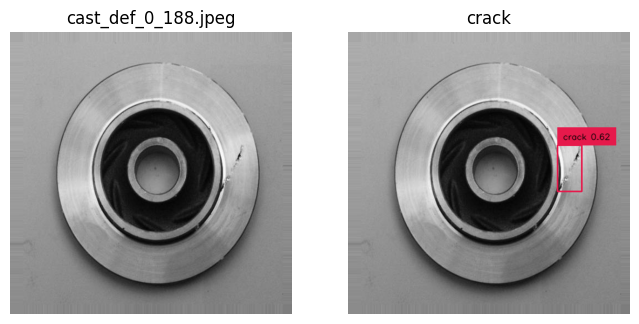

In [15]:
groundingsam.annotate_images()

  0%|          | 0/1 [00:00<?, ?it/s]

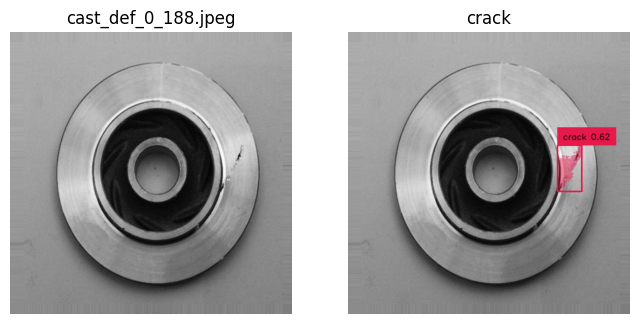

In [16]:
groundingsam.get_masks()